In [1]:
from scipy import stats
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covariates = pd.read_csv('Table_8_county_covariates.csv')

social_capital = pd.read_csv('social_capital_county.csv')

outcomes = pd.read_csv('county_by_cohort_estimates.csv')



In [3]:
outcomes_filtered = outcomes[outcomes['cohort'] == 1990]

outcomes_filtered['code'] = outcomes_filtered['state'].astype(str).str.zfill(2) + outcomes_filtered['county'].astype(str).str.zfill(3)

outcomes_filtered['code'] = outcomes_filtered['code'].astype(int)

outcomes_filtered.head()

/var/folders/4p/n886yd3s3513z05rpt3f5wgm0000gn/T/ipykernel_87094/1528258359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcomes_filtered['code'] = outcomes_filtered['state'].astype(str).str.zfill(2) + outcomes_filtered['county'].astype(str).str.zfill(3)
/var/folders/4p/n886yd3s3513z05rpt3f5wgm0000gn/T/ipykernel_87094/1528258359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcomes_filtered['code'] = outcomes_filtered['code'].astype(int)


,state,county,cohort,state_name,county_name,kfr_aian_female_p1,kfr_asian_female_p1,kfr_black_female_p1,kfr_hisp_female_p1,kfr_pooled_female_p1,...,kii_asian_pooled_p100,kfi_black_pooled_p100,kii_black_pooled_p100,kfi_hisp_pooled_p100,kii_hisp_pooled_p100,kfi_pooled_pooled_p100,kii_pooled_pooled_p100,kfi_white_pooled_p100,kii_white_pooled_p100,code
12,1,1,1990,Alabama,Autauga,NaN,NaN,0.298874,NaN,0.283957,...,NaN,47752.922,41779.715,45934.297,30447.109,53966.441,39598.406,54902.691,39770.652,1001
27,1,3,1990,Alabama,Baldwin,NaN,NaN,0.342133,0.468365,0.393028,...,34614.254,34571.793,31048.742,30529.877,21034.340,50163.406,39295.500,51800.777,40305.914,1003
42,1,5,1990,Alabama,Barbour,NaN,NaN,0.301047,NaN,0.328169,...,NaN,41162.035,39595.102,65981.867,66570.430,49406.117,38859.945,50799.520,36695.668,1005
57,1,7,1990,Alabama,Bibb,NaN,NaN,0.390593,NaN,0.343826,...,NaN,30683.820,25356.107,NaN,NaN,49935.461,32667.670,52317.883,33405.254,1007
72,1,9,1990,Alabama,Blount,NaN,NaN,NaN,0.263821,0.426803,...,NaN,33113.148,20448.207,41039.141,40232.711,55161.094,37706.602,56313.234,38088.707,1009


In [4]:
covariates['code'] = covariates['state'].astype(str).str.zfill(2) + covariates['county'].astype(str).str.zfill(3)

covariates['code'] = covariates['code'].astype(int)

covariates.head()

,county,state,emp_pooled2010,emp_white2010,emp_black2010,emp_pooled1980,emp_white1980,emp_black1980,emp_pooled1990,emp_white1990,...,change_singlepar_white1980_2000,change_singlepar_white1990_2010,change_singlepar_black1980_2000,change_singlepar_black1990_2010,change_singlepar_pooled1980_2000,change_singlepar_pooled1990_2010,change_foreign_share1980_2000,change_foreign_share1990_2009,change_gini1990_2010,code
0,1,1,0.702655,0.719449,0.615410,0.628806,0.659564,0.504379,0.707299,0.736230,...,0.083785,0.084898,0.172905,0.074715,0.093175,0.083812,0.979820,-0.695941,0.004869,1001
1,3,1,0.677877,0.691387,0.550616,0.605038,0.619703,0.514412,0.685152,0.696442,...,0.092472,0.100490,0.137066,0.083455,0.091039,0.089773,0.965969,-0.620555,0.013660,1003
2,5,1,0.513297,0.584708,0.433760,0.572867,0.632886,0.484644,0.657527,0.708404,...,0.075417,0.107190,0.221089,0.196840,0.170286,0.174693,0.978476,-0.731201,-0.016382,1005
3,7,1,0.624909,0.630095,0.605157,0.563666,0.583379,0.487342,0.642003,0.661199,...,0.072768,0.131387,0.166944,0.156914,0.093525,0.135723,0.991592,-0.881286,-0.041399,1007
4,9,1,0.652052,0.657434,0.506903,0.587093,0.586752,0.548896,0.674697,0.675154,...,0.077341,0.097606,0.142857,0.047176,0.079660,0.094573,0.966738,-0.818321,0.002480,1009


In [5]:
merged_df = pd.merge(outcomes_filtered, social_capital, left_on='code', right_on='county', how='inner')

merged_df.head()

merged_df.to_csv('merged_data.csv', index=False)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Columns: 752 entries, state to civic_organizations_county
dtypes: float64(744), int64(5), object(3)
memory usage: 17.6+ MB
None

Missing Values:
state                           0
county_x                        0
cohort                          0
state_name                      0
county_name_x                   0
                             ... 
child_high_bias_county        348
clustering_county               0
support_ratio_county            0
volunteering_rate_county        0
civic_organizations_county      0
Length: 752, dtype: int64

Connectedness Measure Summary:
count    3011.000000
mean        0.814369
std         0.176846
min         0.294690
25%         0.695775
50%         0.806590
75%         0.935670
max         1.359700
Name: ec_county, dtype: float64

Mobility Measures Summary:
       kfr_pooled_pooled_p1  kfr_pooled_pooled_p25  kfr_pooled_pooled_p50  \
count           3029.0000

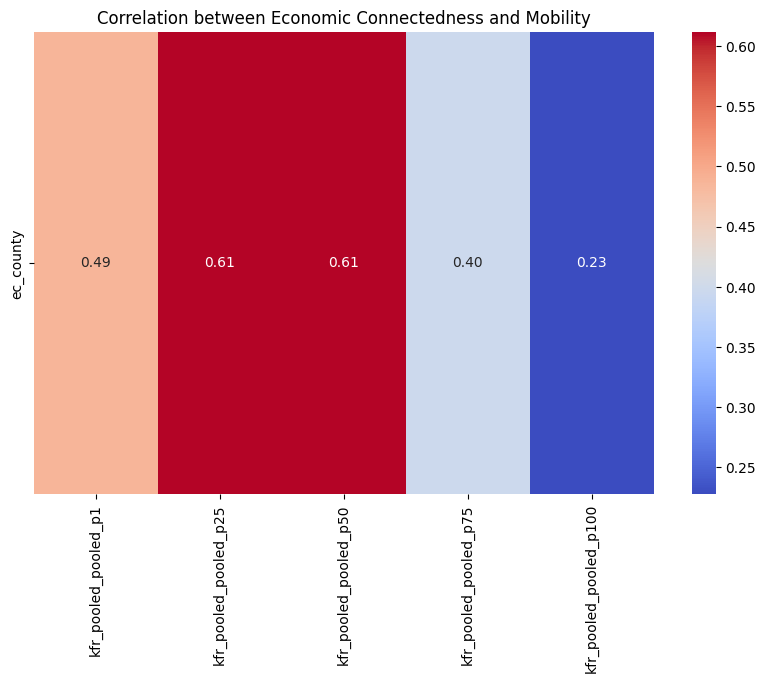

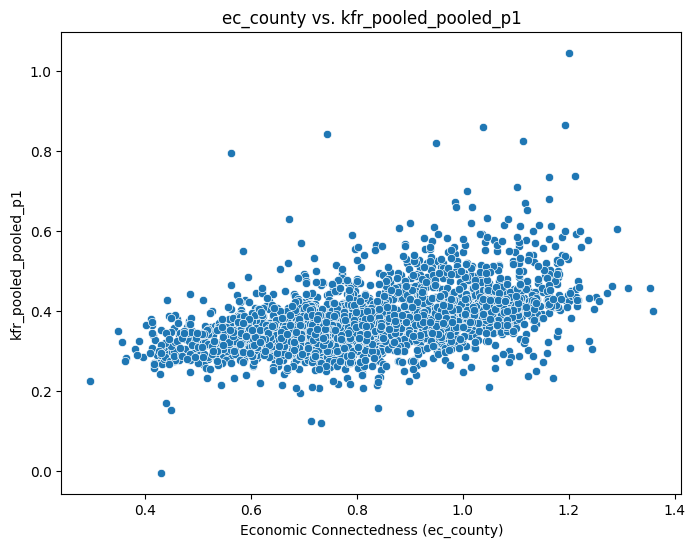

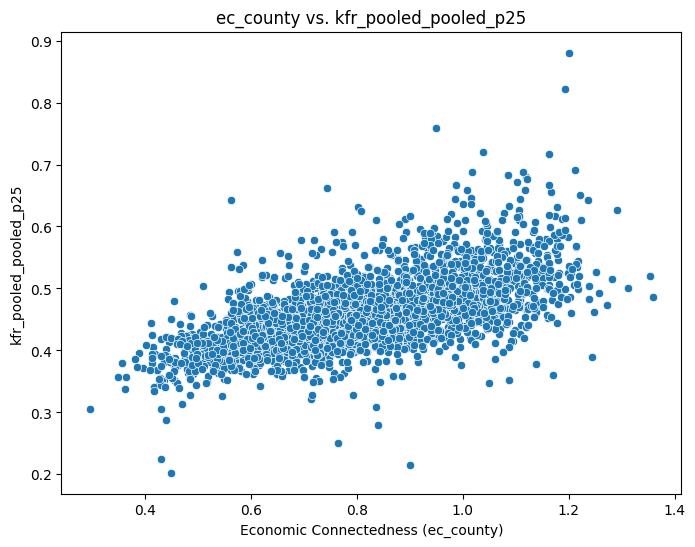

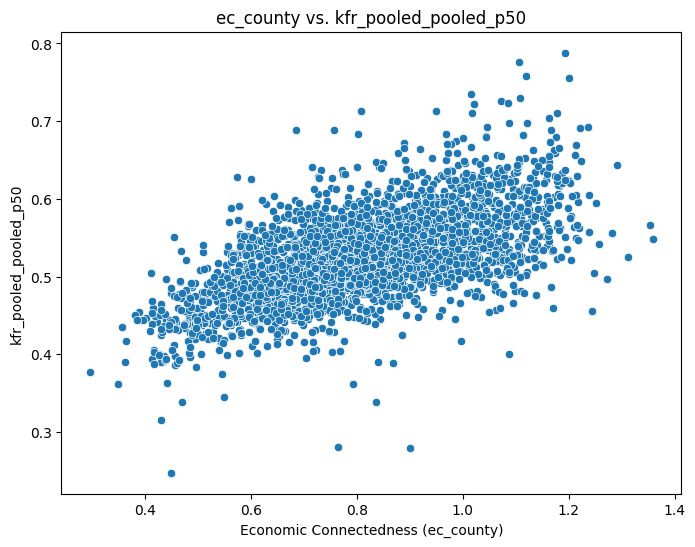

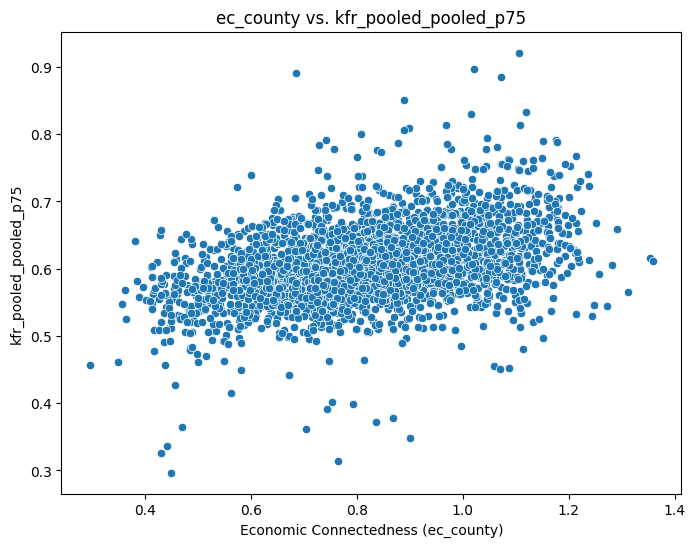

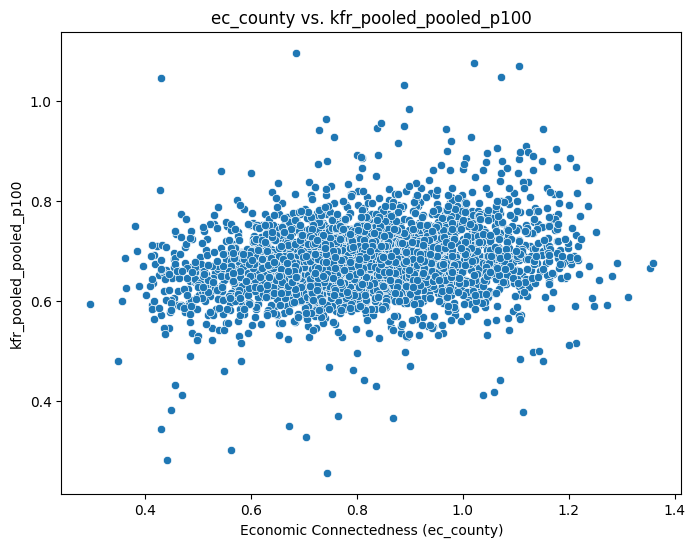

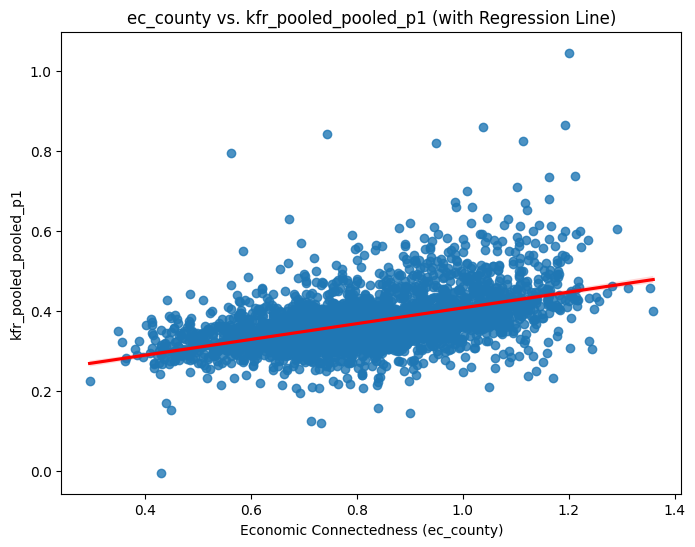

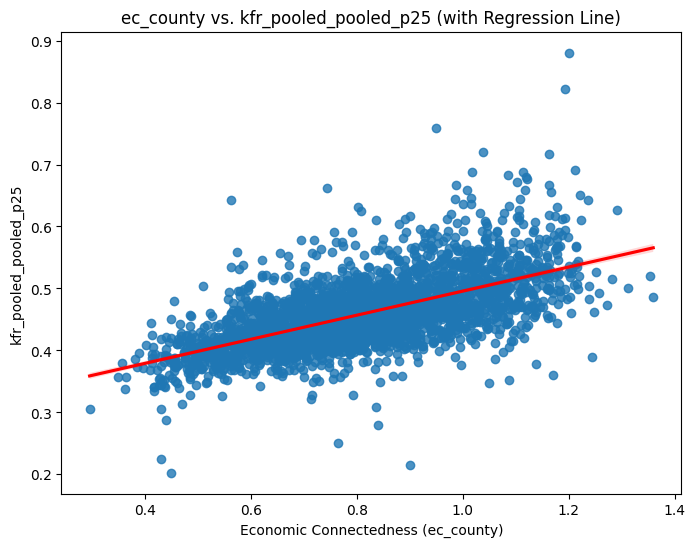

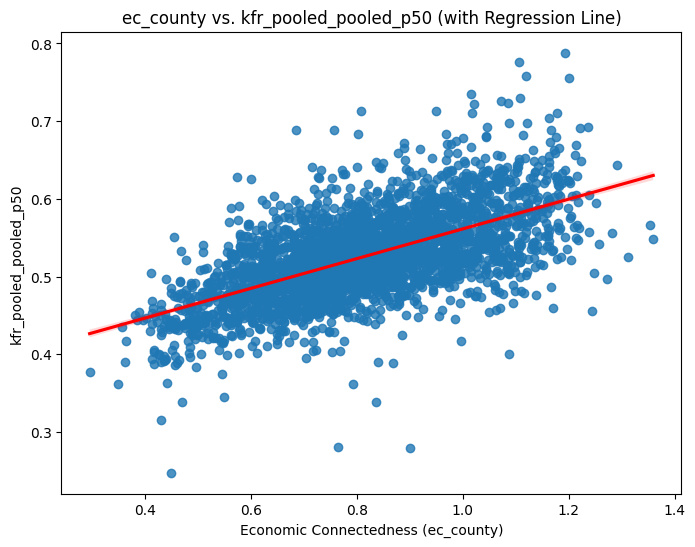

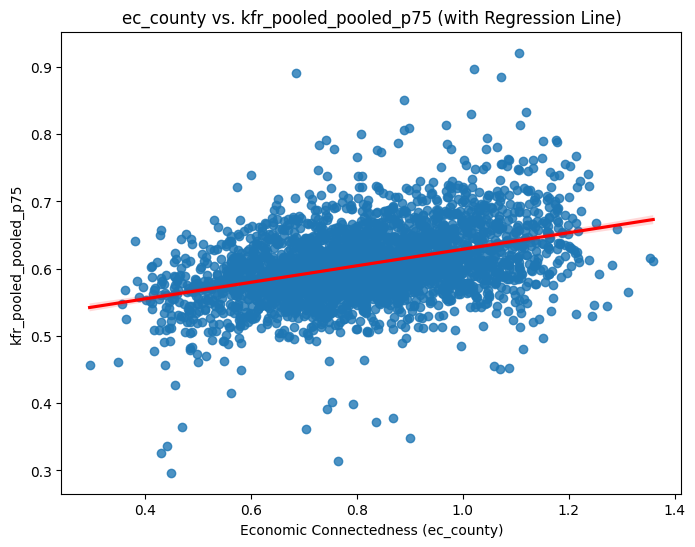

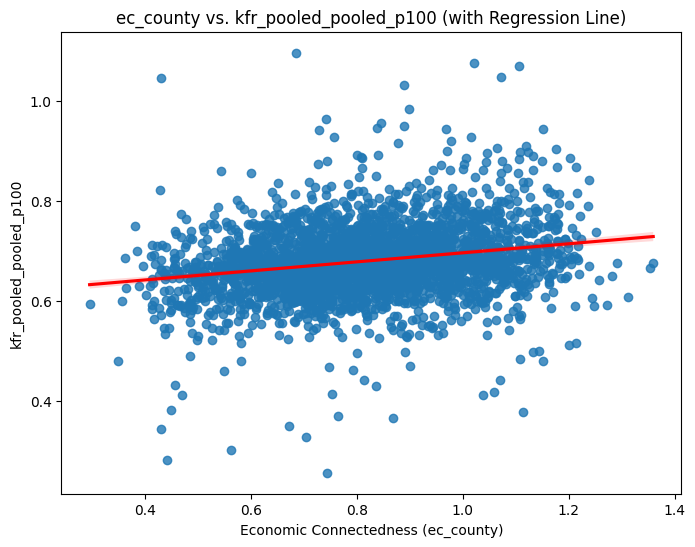

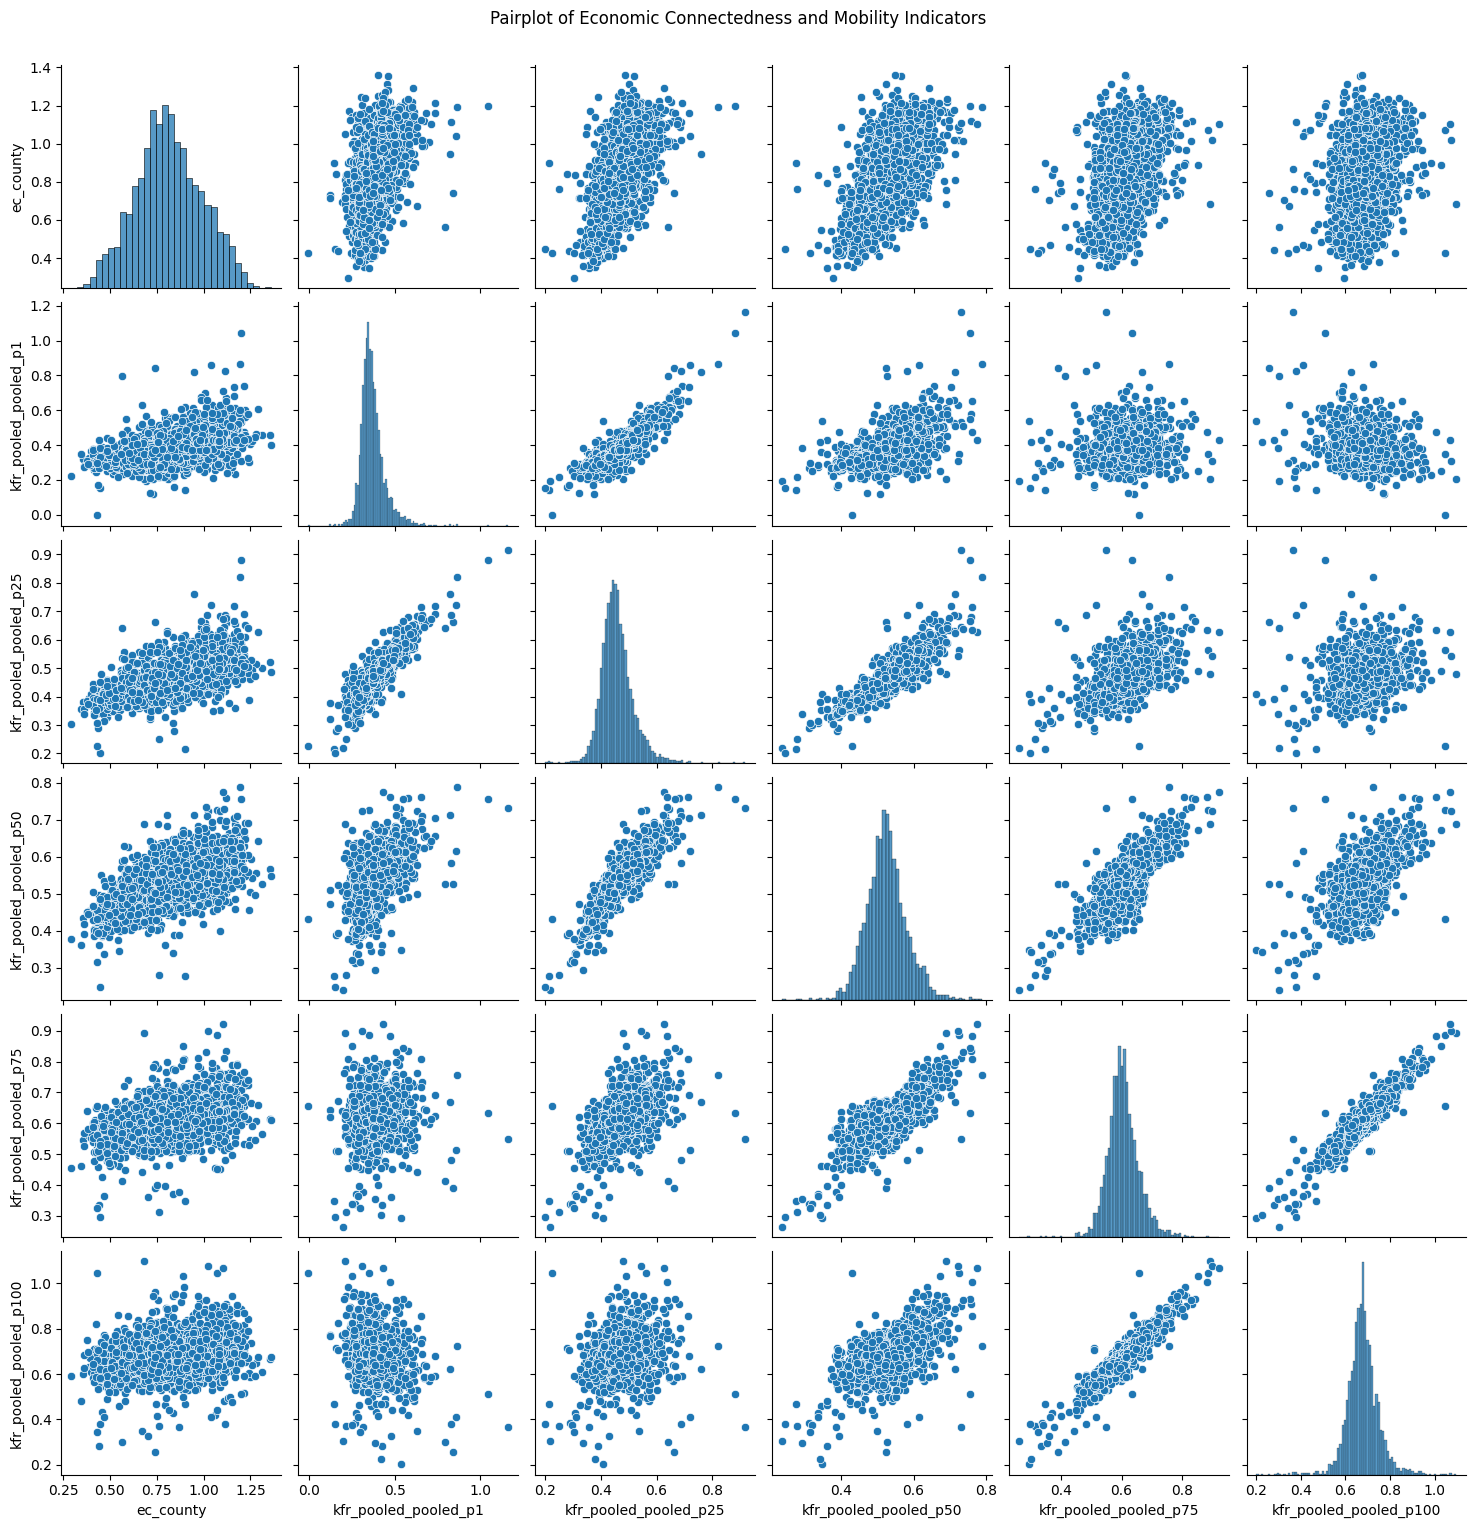

In [6]:

# Display basic information and check for missing values
print("Basic Information:")
print(merged_df.info())
print("\nMissing Values:")
print(merged_df.isnull().sum())

# Define connectedness and mobility columns
connectedness_column = 'ec_county'
mobility_columns = ['kfr_pooled_pooled_p1', 'kfr_pooled_pooled_p25', 'kfr_pooled_pooled_p50', 'kfr_pooled_pooled_p75', 'kfr_pooled_pooled_p100']

# Summary statistics for connectedness and mobility indicators
print("\nConnectedness Measure Summary:")
print(merged_df[connectedness_column].describe())
print("\nMobility Measures Summary:")
print(merged_df[mobility_columns].describe())

# Correlation between connectedness and mobility indicators
correlations = merged_df[[connectedness_column] + mobility_columns].corr()
print("\nCorrelation between Economic Connectedness and Mobility:")
print(correlations.loc[connectedness_column, mobility_columns])

# Heatmap of correlations for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlations.loc[[connectedness_column], mobility_columns], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Economic Connectedness and Mobility")
plt.show()

# Scatter plots to visualize relationships between the connectedness measure and each mobility indicator
for mob_col in mobility_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=merged_df, x=connectedness_column, y=mob_col)
    plt.title(f"{connectedness_column} vs. {mob_col}")
    plt.xlabel("Economic Connectedness (ec_county)")
    plt.ylabel(mob_col)
    plt.show()

# Regression plots to observe trends and potential linear relationships
for mob_col in mobility_columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(data=merged_df, x=connectedness_column, y=mob_col, line_kws={"color": "red"})
    plt.title(f"{connectedness_column} vs. {mob_col} (with Regression Line)")
    plt.xlabel("Economic Connectedness (ec_county)")
    plt.ylabel(mob_col)
    plt.show()

# Optional: Pairplot to explore relationships between connectedness and mobility indicators
sns.pairplot(merged_df[[connectedness_column] + mobility_columns])
plt.suptitle("Pairplot of Economic Connectedness and Mobility Indicators", y=1.02)
plt.show()


# Data Documentation
(as perscribed in Milestone 3 feedback)


In [7]:
# Economic Connectedness Metrics
economic_connectedness_metrics = {
    'ec_county': {
        'description': 'Measure of social connection between high and low-income individuals',
        'calculation': 'Fraction of above-median income friends among below-median income individuals',
        'range': [0, 2],
        'interpretation': 'Higher values indicate more cross-class social connections'
    },
    'clustering_county': {
        'description': 'Measure of social network clustering at county level',
        'calculation': 'Probability that two random friends are themselves friends',
        'range': [0, 1],
        'interpretation': 'Higher values indicate more tightly-knit communities'
    }
}

# Mobility Metrics
mobility_metrics = {
    'kfr_pooled_pooled_p1': {
        'description': 'Expected income rank for children from 1st percentile families',
        'calculation': 'Mean income rank of children whose parents were at p1',
        'range': [0, 1],
        'interpretation': 'Higher values indicate more upward mobility'
    },
    'kfr_pooled_pooled_p25': {
        'description': 'Expected income rank for children from 25th percentile families',
        'range': [0, 1],
        'interpretation': 'Measure of mobility for lower-middle class'
    },
    'kfr_pooled_pooled_p50': {
        'description': 'Expected income rank for children from median income families',
        'range': [0, 1],
        'interpretation': 'Measure of mobility for middle class'
    }
}

# Feature renaming dictionary
rename_dict = {
    'kfr_pooled_pooled_p1': 'mobility_lowest_income',
    'kfr_pooled_pooled_p25': 'mobility_lower_middle',
    'kfr_pooled_pooled_p50': 'mobility_middle_class',
    'kfr_pooled_pooled_p75': 'mobility_upper_middle',
    'kfr_pooled_pooled_p100': 'mobility_highest_income',
    'ec_county': 'economic_connectedness'
}

# EDA-Model Connections Documentation
correlation_analysis = {
    'finding': 'Strong linear relationship between economic connectedness and mobility',
    'model_impact': 'Suggests linear regression as appropriate baseline model',
    'feature_importance': 'Economic connectedness shows highest correlation with middle-class mobility'
}

distribution_analysis = {
    'finding': 'Mobility metrics show approximately normal distribution',
    'model_impact': 'Supports use of models assuming normal distribution of residuals',
    'preprocessing': 'No need for significant transformation of target variables'
}

geographic_patterns = {
    'finding': 'Significant spatial autocorrelation in mobility metrics',
    'model_impact': 'Consider adding spatial features or using hierarchical models',
    'feature_engineering': 'Create regional indicator variables'
}

# Apply improvements to the existing analysis
merged_df = merged_df.rename(columns=rename_dict)

# Print summary of improvements
print("Data Dictionary Categories:")
print("- Economic Connectedness Metrics:", len(economic_connectedness_metrics))
print("- Mobility Metrics:", len(mobility_metrics))
print("Features Renamed:", len(merged_df.columns), "total columns")
print("EDA-Model Connections Documented:", len([correlation_analysis, distribution_analysis, geographic_patterns]), "key insights")

print("\nRenamed Features:", merged_df.columns)
print("\nEDA Model Connections:", {
    'Correlation Analysis': correlation_analysis,
    'Distribution Analysis': distribution_analysis,
    'Geographic Patterns': geographic_patterns
})

Data Dictionary Categories:
- Economic Connectedness Metrics: 2
- Mobility Metrics: 3
Features Renamed: 752 total columns
EDA-Model Connections Documented: 3 key insights

Renamed Features: Index(['state', 'county_x', 'cohort', 'state_name', 'county_name_x',
       'kfr_aian_female_p1', 'kfr_asian_female_p1', 'kfr_black_female_p1',
       'kfr_hisp_female_p1', 'kfr_pooled_female_p1',
       ...
       'child_exposure_county', 'child_high_exposure_county',
       'bias_grp_mem_county', 'bias_grp_mem_high_county', 'child_bias_county',
       'child_high_bias_county', 'clustering_county', 'support_ratio_county',
       'volunteering_rate_county', 'civic_organizations_county'],
      dtype='object', length=752)

EDA Model Connections: {'Correlation Analysis': {'finding': 'Strong linear relationship between economic connectedness and mobility', 'model_impact': 'Suggests linear regression as appropriate baseline model', 'feature_importance': 'Economic connectedness shows highest correlation 

 ## Economic Connectedness (EC) Metric Explanation:

1. Definition:
- Economic connectedness measures the degree to which low-income individuals interact with high-income individuals in their social networks
- Calculated at the county level using social network data

2. Calculation Method:
- Identifies individuals above and below median income in each county
- Computes fraction of high-income friends for each low-income individual
- Aggregates these fractions to create county-level metric

3. Interpretation:
- Values range from 0 to approximately 2
- EC = 1 indicates perfectly balanced connections
- EC < 1 indicates less cross-class interaction
- EC > 1 indicates more cross-class interaction

4. Significance:
- Higher EC associated with increased economic mobility
- Serves as proxy for social capital and opportunity
- Key indicator for policy interventions

# Matt works here


In [8]:
def load_and_prepare_data():
    """Load and prepare the merged dataset"""
    # Load the merged data
    df = pd.read_csv('merged_data.csv')

    # Define key variable groups
    mobility_cols = ['kfr_pooled_pooled_p1', 'kfr_pooled_pooled_p25',
                    'kfr_pooled_pooled_p50', 'kfr_pooled_pooled_p75',
                    'kfr_pooled_pooled_p100']
    social_capital_cols = ['ec_county', 'clustering_county', 'support_ratio_county',
                          'volunteering_rate_county', 'civic_organizations_county']

    return df, mobility_cols, social_capital_cols

def generate_summary_statistics(df, mobility_cols, social_capital_cols):
    """Generate summary statistics for key variables"""
    # Calculate statistics separately
    mobility_stats = df[mobility_cols].describe()
    social_capital_stats = df[social_capital_cols].describe()

    # Create a dictionary to store formatted results
    summary_dict = {
        'Mobility_Stats': mobility_stats,
        'Social_Capital_Stats': social_capital_stats
    }

    return summary_dict
def create_mobility_distribution_plot(df, mobility_cols):
    """Create distribution plots for mobility metrics"""
    plt.figure(figsize=(15, 6))
    for col in mobility_cols:
        sns.kdeplot(data=df[col], label=col.split('_')[3])
    plt.title('Distribution of Mobility Metrics Across Income Percentiles')
    plt.xlabel('Mobility Score')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    return plt.gcf()

def create_correlation_heatmap(df, mobility_cols, social_capital_cols):
    """Create correlation heatmap between mobility and social capital metrics"""
    corr_matrix = df[mobility_cols + social_capital_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap: Mobility vs Social Capital Metrics')
    plt.tight_layout()
    return plt.gcf()

def create_regression_analysis(df):
    """Perform regression analysis for economic connectedness vs mobility"""
    # Create copy of relevant columns and handle missing values
    analysis_df = df[['ec_county', 'kfr_pooled_pooled_p50']].copy()
    analysis_df = analysis_df.dropna()  # Remove rows with missing values

    # Prepare data for regression
    X = analysis_df['ec_county'].values.reshape(-1, 1)
    y = analysis_df['kfr_pooled_pooled_p50'].values

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit regression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Create plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5, color='blue', label='Data Points')
    plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
    plt.xlabel('Economic Connectedness')
    plt.ylabel('Mobility (P50)')
    plt.title(f'Economic Connectedness vs Mobility\nR² = {model.score(X, y):.3f}')
    plt.legend()
    plt.tight_layout()
    return plt.gcf(), model


def create_geographic_analysis(df):
    """Create state-level analysis of mobility and connectedness"""
    state_summary = df.groupby('state_name').agg({
        'ec_county': 'mean',
        'kfr_pooled_pooled_p50': 'mean'
    }).sort_values('kfr_pooled_pooled_p50', ascending=False)

    plt.figure(figsize=(15, 6))
    state_summary.plot(kind='bar')
    plt.title('State-Level Analysis of Economic Connectedness and Mobility')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return plt.gcf(), state_summary


Mobility Statistics:
       kfr_pooled_pooled_p1  kfr_pooled_pooled_p25  kfr_pooled_pooled_p50  \
count           3029.000000            3029.000000            3029.000000   
mean               0.371143               0.459652               0.525605   
std                0.073767               0.057748               0.056971   
min               -0.004395               0.202600               0.240286   
25%                0.327210               0.423380               0.490933   
50%                0.359023               0.453909               0.523452   
75%                0.400754               0.487734               0.557269   
max                1.161462               0.916900               0.788204   

       kfr_pooled_pooled_p75  kfr_pooled_pooled_p100  
count            3029.000000             3029.000000  
mean                0.605482                0.678087  
std                 0.057021                0.073189  
min                 0.263500                0.201698  
25%      

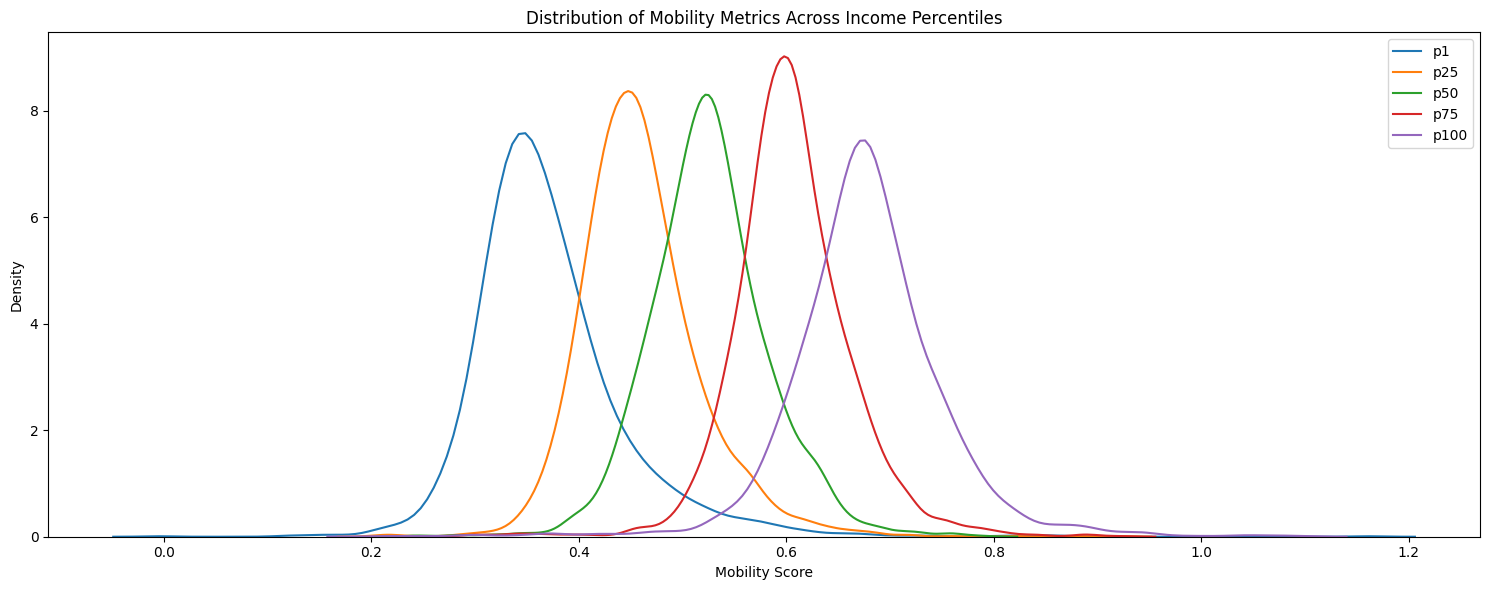

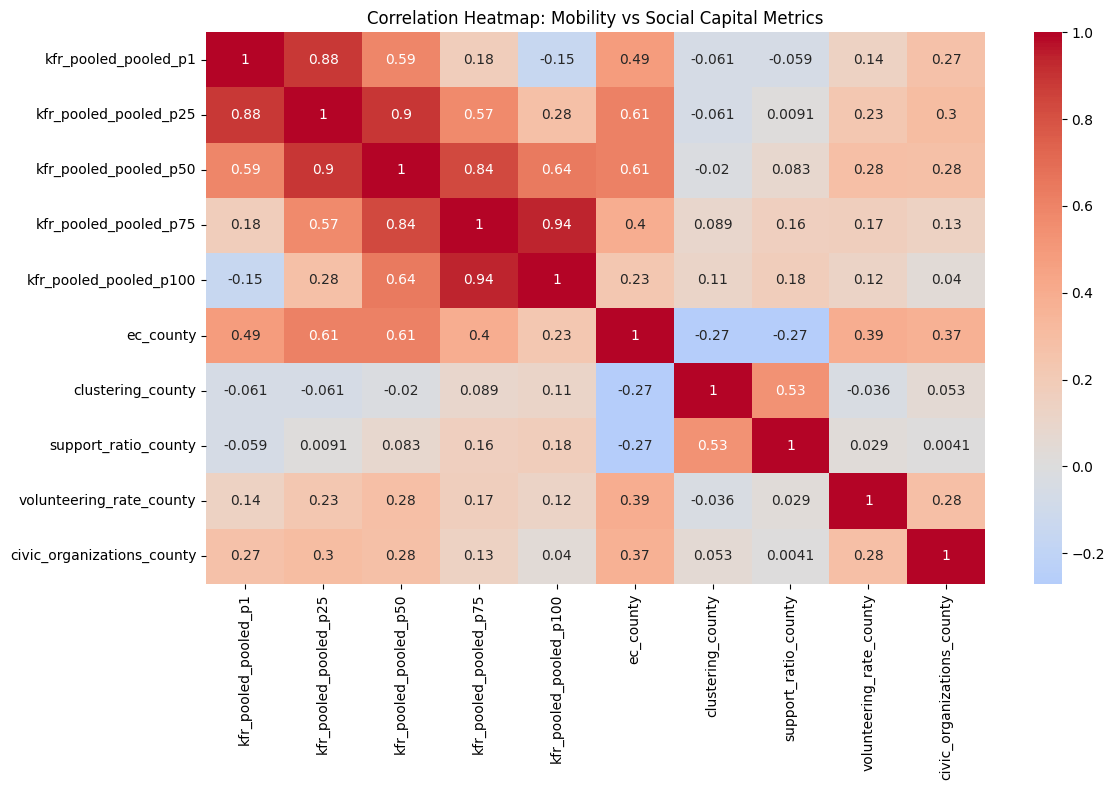

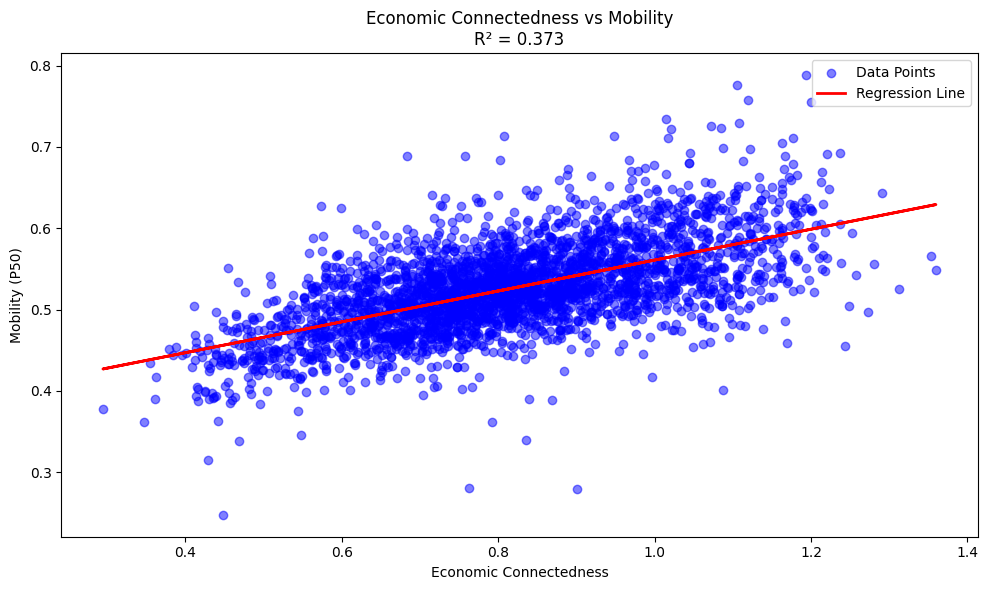

<Figure size 1500x600 with 0 Axes>

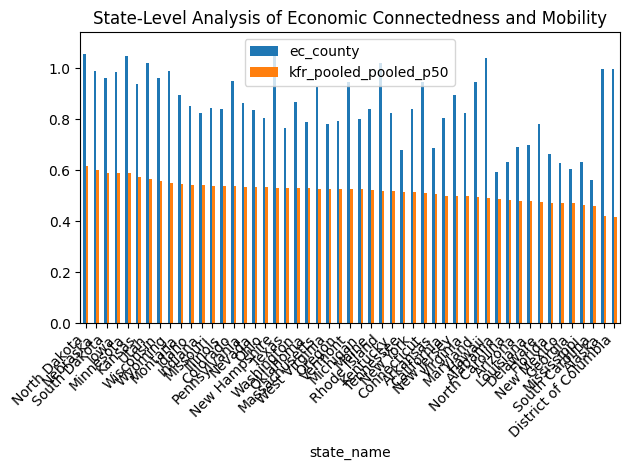

In [9]:
df, mobility_cols, social_capital_cols = load_and_prepare_data()

# Generate all analyses
summary_stats = generate_summary_statistics(df, mobility_cols, social_capital_cols)

# Print summary statistics
print("\nMobility Statistics:")
print(summary_stats['Mobility_Stats'])
print("\nSocial Capital Statistics:")
print(summary_stats['Social_Capital_Stats'])

# Generate plots
mobility_dist_plot = create_mobility_distribution_plot(df, mobility_cols)
correlation_plot = create_correlation_heatmap(df, mobility_cols, social_capital_cols)
regression_plot, model = create_regression_analysis(df)
geographic_plot, state_summary = create_geographic_analysis(df)

# Model Experimentation and Selection

This section is the funcitons that we will use when we actually put hte data through and find the best model of Linear regression, random forest, and gbm

In [10]:
def prepare_features(df):
    """
    Prepare features for modeling
    """
    # Define feature groups
    economic_features = ['economic_connectedness', 'clustering_county', 'support_ratio_county']
    demographic_features = ['volunteering_rate_county', 'civic_organizations_county']

    # Combine features
    features = economic_features + demographic_features

    # Target variable (middle class mobility as primary metric)
    target = 'mobility_middle_class'

    # Split features and target
    X = df[features]
    y = df[target]

    return X, y, features

def create_modeling_pipeline():
    """
    Create and evaluate multiple baseline models
    """
    def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
        # Train model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        return {
            'model_name': model_name,
            'mse': mse,
            'r2': r2,
            'model': model
        }

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }

    return models, evaluate_model

def train_and_evaluate_models(df):
    """
    Train and evaluate all baseline models
    """
    # Prepare data
    X, y, features = prepare_features(df)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Get models and evaluation function
    models, evaluate_model = create_modeling_pipeline()

    # Train and evaluate each model
    results = []
    for name, model in models.items():
        result = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
        results.append(result)
        print(f"\nResults for {name}:")
        print(f"MSE: {result['mse']:.4f}")
        print(f"R2 Score: {result['r2']:.4f}")

    return results, X_train_scaled, X_test_scaled, y_train, y_test, features

def analyze_feature_importance(results, features):
    """
    Analyze and visualize feature importance for each model
    """
    for result in results:
        model = result['model']
        model_name = result['model_name']

        if model_name == 'Linear Regression':
            importance = np.abs(model.coef_)
        else:
            importance = model.feature_importances_

        # Create feature importance plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x=importance, y=features)
        plt.title(f'Feature Importance - {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.tight_layout()
        plt.show()

def compare_model_performance(results):
    """
    Compare and visualize model performance
    """
    model_names = [r['model_name'] for r in results]
    r2_scores = [r['r2'] for r in results]
    mse_scores = [r['mse'] for r in results]

    # Create performance comparison plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # R2 Score comparison
    sns.barplot(x=model_names, y=r2_scores, ax=ax1)
    ax1.set_title('R² Score Comparison')
    ax1.set_ylabel('R² Score')

    # MSE comparison
    sns.barplot(x=model_names, y=mse_scores, ax=ax2)
    ax2.set_title('MSE Comparison')
    ax2.set_ylabel('Mean Squared Error')

    plt.tight_layout()
    plt.show()

# Main execution
def run_baseline_analysis(df):
    """
    Run complete baseline analysis
    """
    # Train and evaluate models
    results, X_train, X_test, y_train, y_test, features = train_and_evaluate_models(df)

    # Analyze feature importance
    analyze_feature_importance(results, features)

    # Compare model performance
    compare_model_performance(results)

    return results

# Add model interpretation
def interpret_results(results):
    """
    Provide interpretation of model results
    """
    interpretation = {
        'Best Model': max(results, key=lambda x: x['r2'])['model_name'],
        'Model Comparison': {
            model['model_name']: {
                'R2': model['r2'],
                'MSE': model['mse'],
                'Strengths': get_model_strengths(model['model_name']),
                'Weaknesses': get_model_weaknesses(model['model_name'])
            } for model in results
        }
    }
    return interpretation

def get_model_strengths(model_name):
    """Helper function to provide model strengths"""
    strengths = {
        'Linear Regression': ['Interpretability', 'Computational efficiency', 'Good for linear relationships'],
        'Random Forest': ['Handles non-linearity', 'Feature importance', 'Robust to outliers'],
        'Gradient Boosting': ['High performance', 'Handles different types of predictors', 'Feature importance']
    }
    return strengths.get(model_name, [])

def get_model_weaknesses(model_name):
    """Helper function to provide model weaknesses"""
    weaknesses = {
        'Linear Regression': ['Assumes linearity', 'Sensitive to outliers', 'Limited complexity'],
        'Random Forest': ['Less interpretable', 'Computationally intensive', 'Risk of overfitting'],
        'Gradient Boosting': ['Risk of overfitting', 'Sensitive to noisy data', 'Requires careful tuning']
    }
    return weaknesses.get(model_name, [])

Here we actually do the model selection on the data

Initial merged_df shape: (3076, 752)

Columns in merged_df: ['state', 'county_x', 'cohort', 'state_name', 'county_name_x', 'kfr_aian_female_p1', 'kfr_asian_female_p1', 'kfr_black_female_p1', 'kfr_hisp_female_p1', 'kfr_pooled_female_p1', 'kfr_white_female_p1', 'kfr_aian_male_p1', 'kfr_asian_male_p1', 'kfr_black_male_p1', 'kfr_hisp_male_p1', 'kfr_pooled_male_p1', 'kfr_white_male_p1', 'kfr_aian_pooled_p1', 'kfr_asian_pooled_p1', 'kfr_black_pooled_p1', 'kfr_hisp_pooled_p1', 'mobility_lowest_income', 'kfr_white_pooled_p1', 'kfr_aian_female_p25', 'kfr_aian_female_p25_se', 'kfr_asian_female_p25', 'kfr_asian_female_p25_se', 'kfr_black_female_p25', 'kfr_black_female_p25_se', 'kfr_hisp_female_p25', 'kfr_hisp_female_p25_se', 'kfr_pooled_female_p25', 'kfr_pooled_female_p25_se', 'kfr_white_female_p25', 'kfr_white_female_p25_se', 'kfr_aian_male_p25', 'kfr_aian_male_p25_se', 'kfr_asian_male_p25', 'kfr_asian_male_p25_se', 'kfr_black_male_p25', 'kfr_black_male_p25_se', 'kfr_hisp_male_p25', 'kfr_hisp_ma

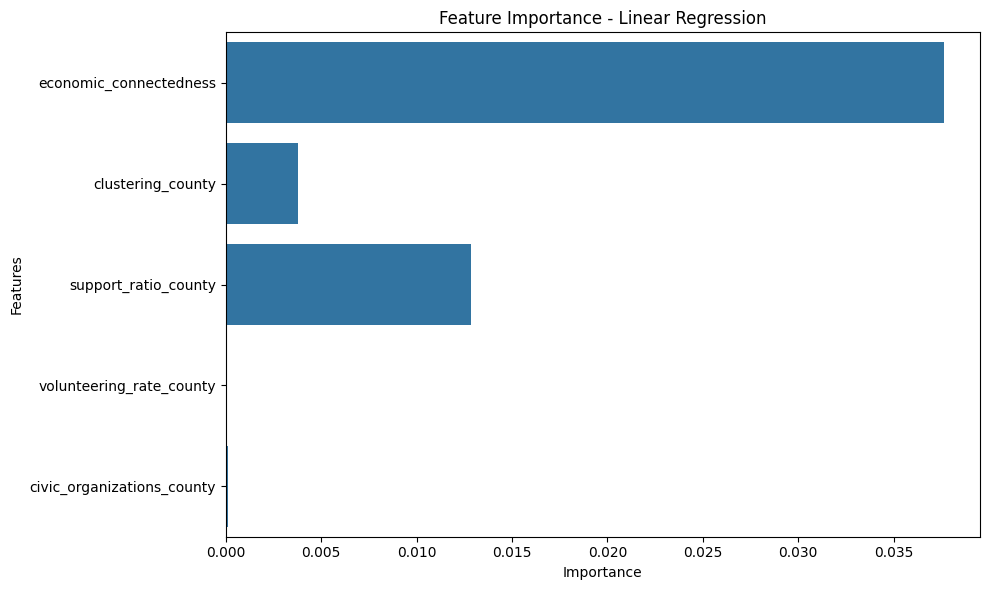

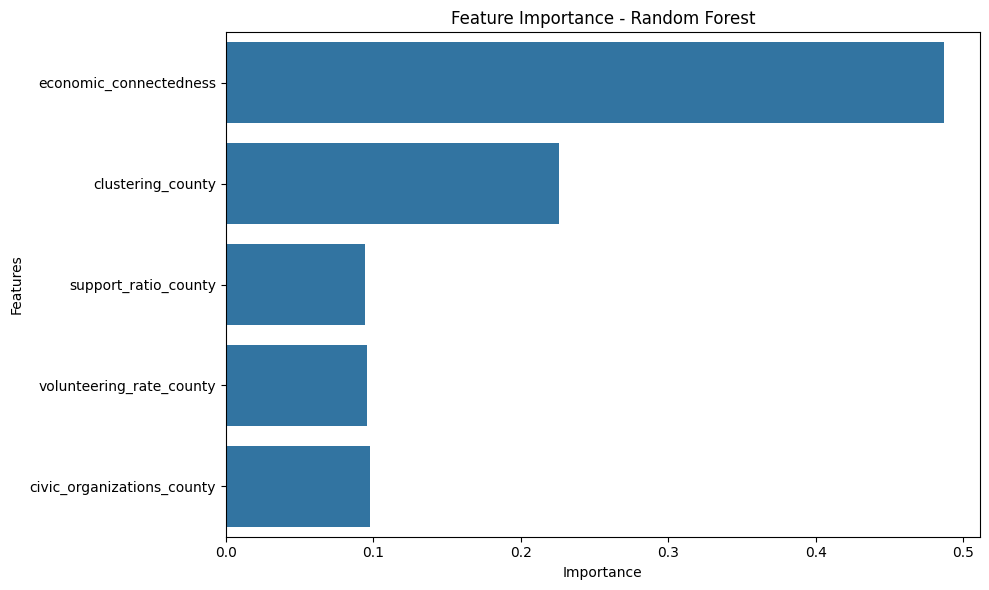

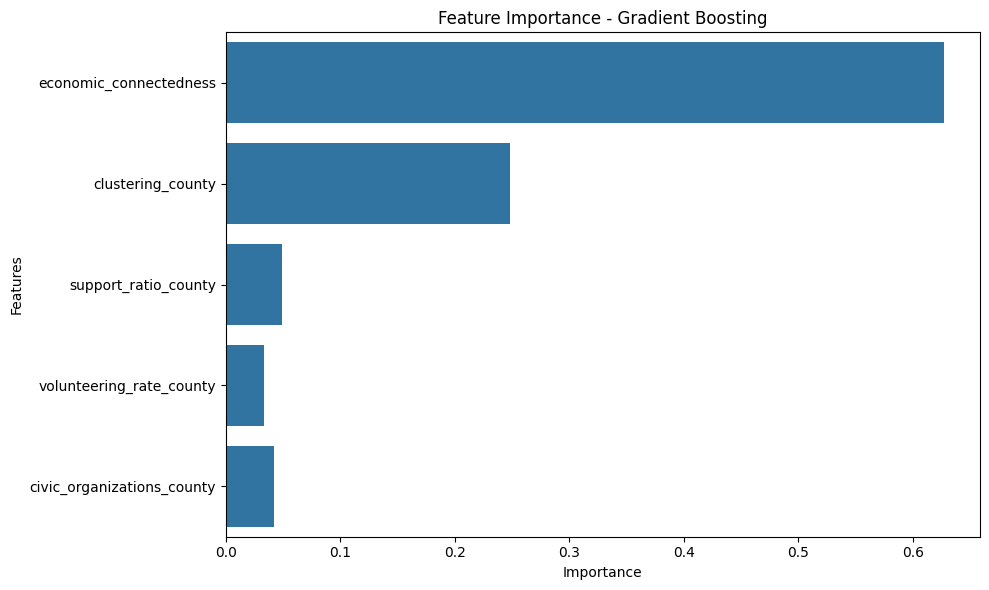

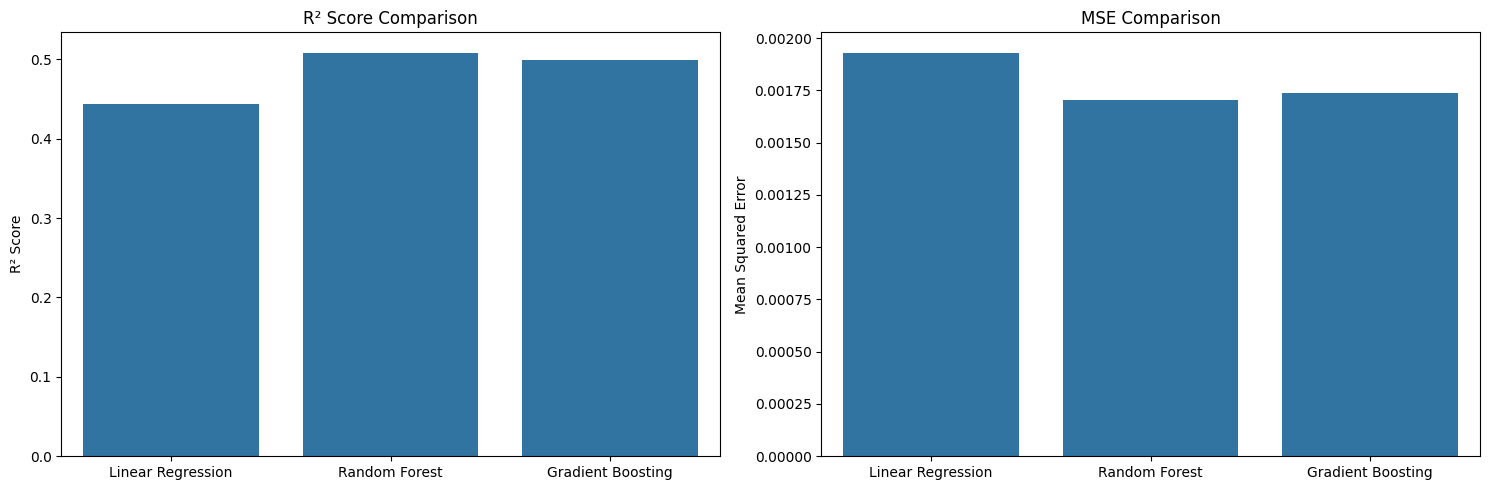


Model Performance Summary:
Best performing model: Random Forest

Detailed Model Comparison:

------------------------------
Model: Linear Regression
R² Score: 0.4434
MSE: 0.0019

Strengths:
- Interpretability
- Computational efficiency
- Good for linear relationships

Weaknesses:
- Assumes linearity
- Sensitive to outliers
- Limited complexity

------------------------------
Model: Random Forest
R² Score: 0.5086
MSE: 0.0017

Strengths:
- Handles non-linearity
- Feature importance
- Robust to outliers

Weaknesses:
- Less interpretable
- Computationally intensive
- Risk of overfitting

------------------------------
Model: Gradient Boosting
R² Score: 0.4993
MSE: 0.0017

Strengths:
- High performance
- Handles different types of predictors
- Feature importance

Weaknesses:
- Risk of overfitting
- Sensitive to noisy data
- Requires careful tuning


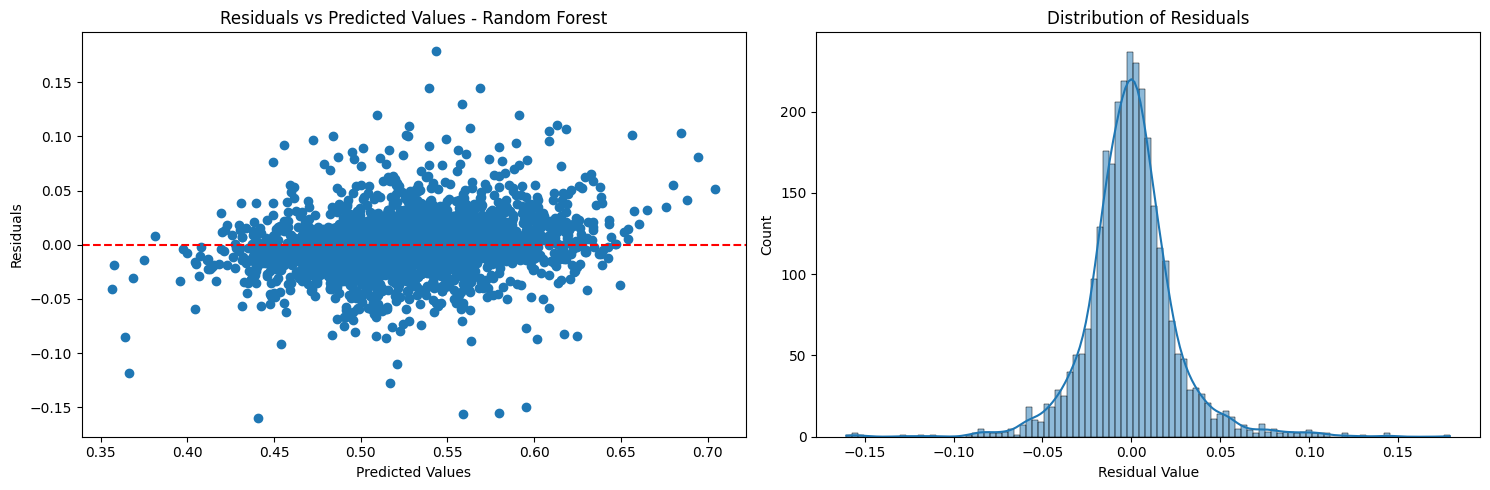

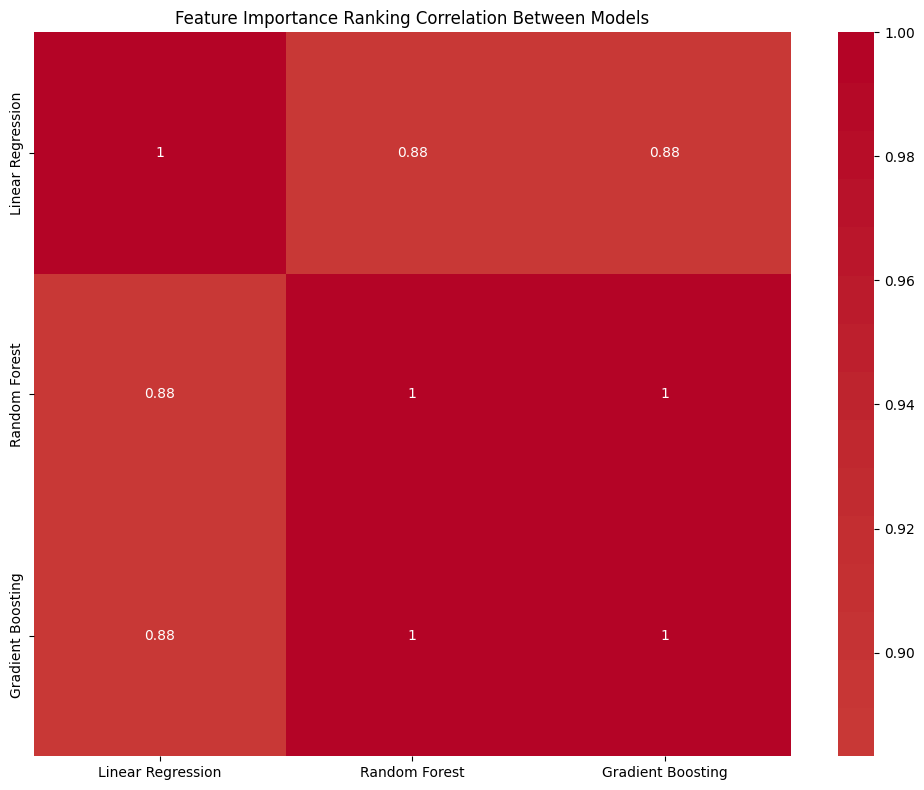

In [11]:
# First, let's verify our data is ready
print("Initial merged_df shape:", merged_df.shape)
print("\nColumns in merged_df:", merged_df.columns.tolist())

# Prepare the data by renaming columns first
def prepare_merged_df(df):
    """
    Prepare merged_df for modeling by renaming columns and handling any missing values
    """
    # Rename columns for clarity
    rename_dict = {
        'kfr_pooled_pooled_p1': 'mobility_lowest_income',
        'kfr_pooled_pooled_p25': 'mobility_lower_middle',
        'kfr_pooled_pooled_p50': 'mobility_middle_class',
        'kfr_pooled_pooled_p75': 'mobility_upper_middle',
        'kfr_pooled_pooled_p100': 'mobility_highest_income',
        'ec_county': 'economic_connectedness'
    }
    df = df.rename(columns=rename_dict)

    # Handle missing values
    df = df.dropna(subset=['economic_connectedness', 'mobility_middle_class'])

    return df

# Prepare the dataset
prepared_df = prepare_merged_df(merged_df)
print("\nPrepared dataset shape:", prepared_df.shape)

# Run the baseline analysis
print("\nRunning baseline model analysis...")
results = run_baseline_analysis(prepared_df)

# Get model interpretation
interpretation = interpret_results(results)

# Print detailed results
print("\nModel Performance Summary:")
print("=" * 50)
print(f"Best performing model: {interpretation['Best Model']}")
print("\nDetailed Model Comparison:")
for model_name, metrics in interpretation['Model Comparison'].items():
    print("\n" + "-" * 30)
    print(f"Model: {model_name}")
    print(f"R² Score: {metrics['R2']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print("\nStrengths:")
    for strength in metrics['Strengths']:
        print(f"- {strength}")
    print("\nWeaknesses:")
    for weakness in metrics['Weaknesses']:
        print(f"- {weakness}")

# Create visualization of residuals for the best model
def plot_residuals(results, prepared_df):
    """
    Plot residuals for the best performing model
    """
    best_model = max(results, key=lambda x: x['r2'])
    model_name = best_model['model_name']
    model = best_model['model']

    # Prepare features and target
    X, y, _ = prepare_features(prepared_df)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Get predictions
    y_pred = model.predict(X_scaled)
    residuals = y - y_pred

    # Create residual plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Residuals vs Predicted
    ax1.scatter(y_pred, residuals)
    ax1.axhline(y=0, color='r', linestyle='--')
    ax1.set_xlabel('Predicted Values')
    ax1.set_ylabel('Residuals')
    ax1.set_title(f'Residuals vs Predicted Values - {model_name}')

    # Residual distribution
    sns.histplot(residuals, kde=True, ax=ax2)
    ax2.set_title('Distribution of Residuals')
    ax2.set_xlabel('Residual Value')

    plt.tight_layout()
    plt.show()

# Plot residuals
plot_residuals(results, prepared_df)

# Additional analysis: Feature importance correlation
def analyze_feature_importance_correlation(results, prepared_df):
    """
    Analyze correlation between feature importance rankings across models
    """
    X, _, features = prepare_features(prepared_df)

    # Get feature importance for each model
    importance_dict = {}
    for result in results:
        model = result['model']
        model_name = result['model_name']

        if model_name == 'Linear Regression':
            importance = np.abs(model.coef_)
        else:
            importance = model.feature_importances_

        importance_dict[model_name] = importance

    # Create correlation matrix of feature importance rankings
    importance_df = pd.DataFrame(importance_dict, index=features)
    correlation = importance_df.corr()

    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Importance Ranking Correlation Between Models')
    plt.tight_layout()
    plt.show()

# Analyze feature importance correlation
analyze_feature_importance_correlation(results, prepared_df)

Wow! this is awesome. lets' interprert the results:
